In [19]:
import numpy as np
import pickle
from Corrfunc.theory import DD, DDrppi
from Corrfunc.utils import convert_3d_counts_to_cf, convert_rp_pi_counts_to_wp
import tqdm
import matplotlib.pyplot as plt

In [2]:
with open('./displacement.bin', 'rb') as f:
    displacement = pickle.load(f)

In [20]:
nthread = 40

sep_min = 0.1
sep_max = 100
sep_N = 30

pimax = 100                         # this should match the result from auto corr
boxsize = 2500

rp_bins = np.geomspace(sep_min, sep_max, sep_N+1)
rp = (rp_bins[1:]*rp_bins[:-1])**0.5


## 1h s-s term

In [4]:
NR = 1000_000_000
n = NR / (boxsize**3)

wp_array = np.zeros((len(displacement), sep_N))

counts = []
for i in tqdm.trange(len(displacement)):
    sat = displacement[i]
    ND = len(sat)
    D1D2 = DDrppi(1, nthread, pimax, rp_bins, X1=sat[:,0].T + boxsize/2, Y1=sat[:,1].T + boxsize/2, Z1=sat[:,2].T + boxsize/2, periodic=False, boxsize=boxsize, verbose=False)

    counts.append(D1D2)

import pickle
with open('1h_ss_count.bin', 'wb') as f:
    pickle.dump(counts, f)

  4%|▍         | 7/161 [05:06<1:52:27, 43.82s/it]


RuntimeError: RuntimeError occurred

In [4]:
import pickle
with open('1h_ss_count.bin', 'rb') as f:
    counts = pickle.load(f)

In [15]:
area = np.pi*(rp_bins[1:]**2 - rp_bins[:-1]**2)
wf = np.zeros((len(counts), sep_N))

for i in range(len(counts)):
    count = counts[i]
    total = displacement[i].shape[0]
    for j in range(sep_N):
        wf[i,j] = count['npairs'][j*pimax:(j+1)*pimax].sum() / area[j] / (total*(total-1))

In [16]:
(wf[80]*area).sum()

0.9179623066432543

In [17]:
np.save('1h_ss_wp', wf)

[]

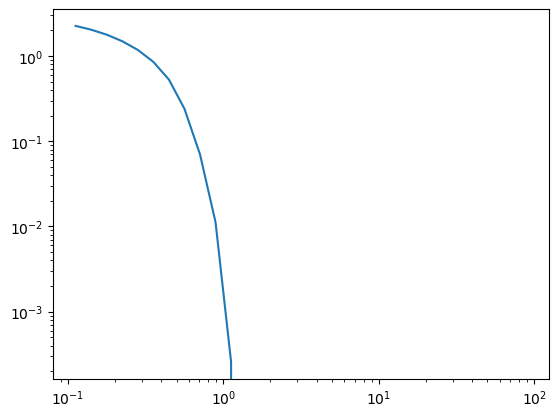

In [18]:
plt.plot(rp, wf[80])
plt.loglog()

## 1h c-s term

In [9]:
wf_cs = np.zeros((len(displacement), sep_N))

area = np.pi*(rp_bins[1:]**2 - rp_bins[:-1]**2)

for i in tqdm.tqdm(range(len(displacement))):
    sat = displacement[i]
    ND = len(sat)

    radius = np.sqrt(sat[:,0]**2 + sat[:,1]**2)

    count = np.bincount(np.digitize(radius, rp_bins), minlength=sep_N+1)[1:]

    wf_cs[i] = count / area / ND

  0%|          | 0/161 [00:00<?, ?it/s]

100%|██████████| 161/161 [00:01<00:00, 130.43it/s]


In [12]:
(wf_cs[80]*area).sum()

0.7820540499592826

In [11]:
np.save('1h_cs_wp', wf_cs)

In [7]:
rp = (rp_bins[1:]*rp_bins[:-1])**0.5

[]

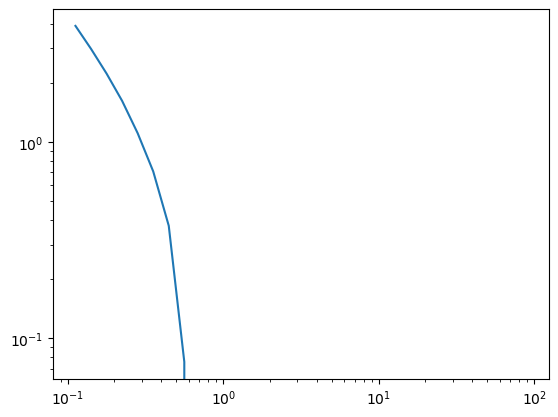

In [9]:
plt.plot(rp, wf_cs[80])
plt.loglog()